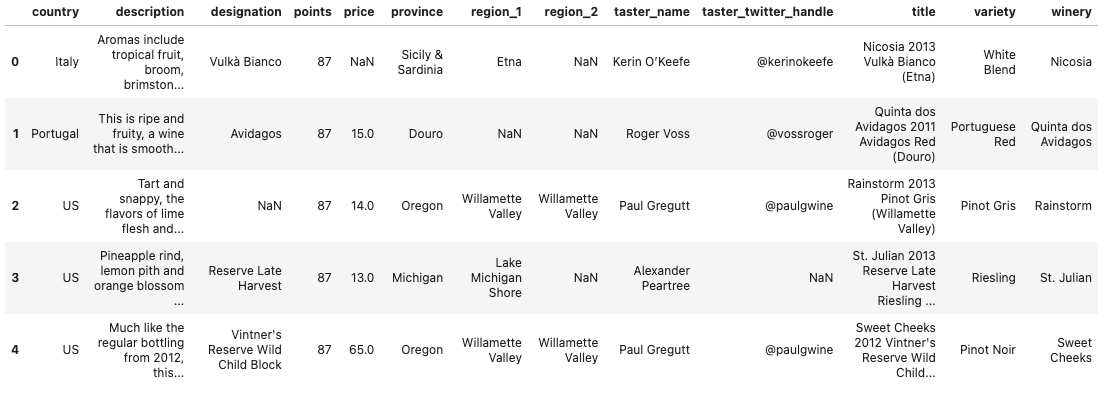

In [ ]:
# What is the median of the points column in the reviews DataFrame?
median_points = reviews.points.median()

# What countries are represented in the dataset? (Your answer should not include any duplicates.)
countries = reviews.country.unique()

# How often does each country appear in the dataset? Create a Series reviews_per_country mapping countries to the count of reviews of wines from that country.
reviews_per_country = reviews.country.value_counts()

# Create variable centered_price containing a version of the price column with the mean price subtracted.
centered_price = reviews.price - reviews.price.mean()

# I'm an economical wine buyer. Which wine is the "best bargain"? Create a variable bargain_wine with the title of the wine with the highest points-to-price ratio in the dataset.
bargain_idx = (reviews.points / reviews.price).idxmax()
bargain_wine = reviews.loc[bargain_idx, 'title']
bargain_wine

# There are only so many words you can use when describing a bottle of wine. Is a wine more likely to be "tropical" or "fruity"? Create a Series descriptor_counts counting how many times each of these two words appears in the description column in the dataset.
n_trop = reviews.description.map(lambda desc: "tropical" in desc).sum()
n_fruity = reviews.description.map(lambda desc: "fruity" in desc).sum()
descriptor_counts = pd.Series([n_trop, n_fruity], index=['tropical', 'fruity'])

# We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.
# Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.
# Create a series star_ratings with the number of stars corresponding to each review in the dataset.
def stars(row):
    if row.country == 'Canada':
        return 3
    elif row.points >= 95:
        return 3
    elif row.points >= 85:
        return 2
    else:
        return 1

star_ratings = reviews.apply(stars, axis='columns')